# Exercise 4b - ZKP Considerations - plots

This notebook takes the measurements from the exercise 4a and plots the results.
Some important notes:

- **The y axis is logarithmic!**
- **All measurements depend on the docknetwork/crypto library** - optimizing proofs can often reduce load and communication by orders of magnitude.

## Sections

1. Load on server and client
2. Communication Sizes

---

## 1. Load on server and client

For LegoGroth16, the following steps need to be done:
1. server (verifier) creates the setup and sends it to the holder
2. client (holder) creates the proof and sends it to the verifier
3. server (verifier) verifies the proof

For BulletProofs++, the following steps need to be done:
1. client (holder) creates the setup and the proof and sends the proof to the server
2. server (verifier) creates the setup and verifies the proof

- **Total verifier load** shows the load for LG16 (blue/yellow, setup + verification) and Bp++ (purple/red, setup + verification)  
- **Total holder load** shows the load for LG16 (yellow, proof creation) and Bp++ (purple/red, setup + proof creation)

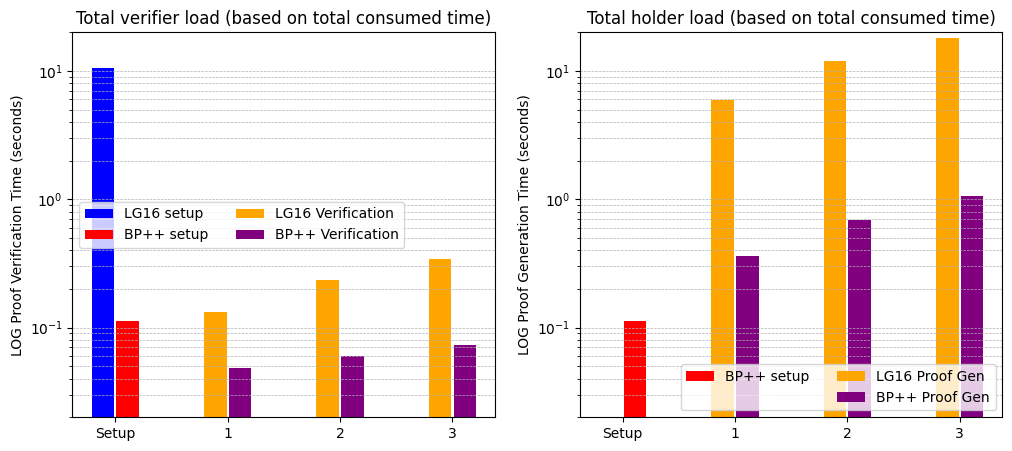

In [69]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

labels = ['Setup', '1', '2', '3']

# Total verifier time-based load for LG16 (blue, setup + verification) and Bp++ (red, setup + verification)  
lg16_verifiers_setup_times = [10.563, 0, 0, 0]
lg16_verifiers_verification_times = [0, 0.133, 0.235, 0.342]

bp_verifiers_setup_times = [0.113, 0, 0, 0]
bp_verifiers_verification_times = [0, 0.048, 0.06, 0.073]

# Total holder time-based load for LG16 (blue, proof creation) and Bp++ (red, setup + proof creation)
lg16_holders_proof_creation_times = [0, 5.954, 11.906, 17.98]

bp_holders_setup_times = [0.113, 0, 0, 0]
bp_holders_proof_creation_times = [0, 0.36, 0.692, 1.051]

width = 0.2       # the width of the bars: can also be len(x) sequence

fig, axes = plt.subplots(1, 2, figsize=[12, 5])

# ------------------------------ Setting up first graph For verifiers -------------------------------------------------------------------------

h1 = axes[0].bar([i - 0.11 for i in range(4)], lg16_verifiers_setup_times, width, label='LG16 setup', color="blue")
h2 = axes[0].bar([i - 0.11 for i in range(4)], lg16_verifiers_verification_times, width, bottom=lg16_verifiers_setup_times, label='LG16 Verification', color="orange")

h3 = axes[0].bar([i + 0.11 for i in range(4)], bp_verifiers_setup_times, width, label='BP++ setup', color="red")
h4 = axes[0].bar([i + 0.11 for i in range(4)], bp_verifiers_verification_times, width, bottom=bp_verifiers_setup_times, label='BP++ Verification', color="purple")

axes[0].set_ylabel('LOG Proof Verification Time (seconds)')
axes[0].set_title('Total verifier load (based on total consumed time)')
axes[0].set_yscale('log')
axes[0].set_ylim(0.02, 20)
axes[0].yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_xticks(range(len(labels)), labels)
axes[0].legend(loc="center left", handles=[h1, h3, h2, h4], ncols=2);

# ------------------------------ Setting up Second graph for holders -------------------------------------------------------------------------

#axes[1].bar([i - 0.11 for i in range(4)], lg16_holders_setup_times, width, label='LG16 setupTime', color="blue")
h1 = Line2D([], [], color='none', label='')
h2 = axes[1].bar([i - 0.11 for i in range(4)], lg16_holders_proof_creation_times, width, label='LG16 Proof Gen', color="orange")

h3 = axes[1].bar([i + 0.11 for i in range(4)], bp_holders_setup_times, width, label='BP++ setup', color="red")
h4 = axes[1].bar([i + 0.11 for i in range(4)], bp_holders_proof_creation_times, width, bottom=bp_holders_setup_times, label='BP++ Proof Gen', color="purple")

axes[1].set_ylabel('LOG Proof Generation Time (seconds)')
axes[1].set_title('Total holder load (based on total consumed time)')
axes[1].set_yscale('log')
axes[1].set_ylim(0.02, 20)
axes[1].yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_xticks(range(len(labels)), labels)
axes[1].legend(loc="lower right", handles=[h3, h1, h2, h4], ncols=2);


plt.show()

---

## 2. Communication Sizes

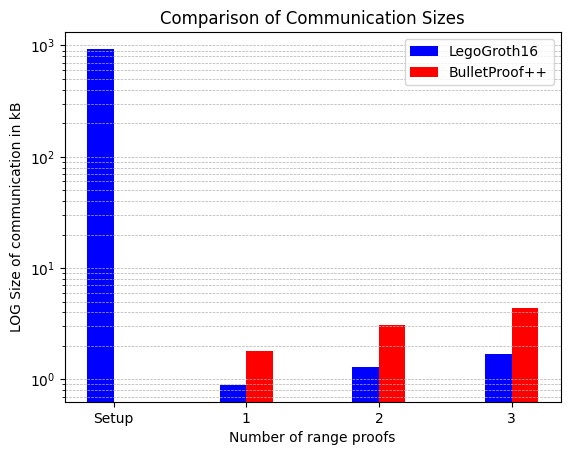

In [70]:
import matplotlib.pyplot as plt

legoGroth16Size = [930100/1000, 0.892, 1.293, 1.694]
bulletProofSize = [0, 1.798, 3.105, 4.412]

# Create the bar chart
plt.bar([i - 0.1 for i in range(len(legoGroth16Size))], legoGroth16Size, width=0.2, label="LegoGroth16", color="blue")
plt.bar([i + 0.1 for i in range(len(bulletProofSize))], bulletProofSize, width=0.2, label="BulletProof++", color="red")

# Add labels and title
plt.xlabel("Number of range proofs")
plt.ylabel("LOG Size of communication in kB")
plt.yscale('log')
plt.title("Comparison of Communication Sizes")
plt.xticks(range(len(legoGroth16Size)), ["Setup", "1", "2", "3"])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis="y")
plt.legend()

# Show the plot
plt.show()